In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import trapezoid, simpson, romberg, quad

# Laboratorio 06: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Juan José Usuga Giraldo  1020482080
*Métodos computacionales 2024-II*

---

#1

Usando los métodos trapezoidal, Simpson y cuadratura encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [ ]:
def f(x):
  return 1 / np.sqrt(np.tan(x))
a, b = 0.001, (np.pi)/2

In [ ]:
   qua, error = quad(f, a, b)
   print(f"Cuadratura : {qua:.6f}")
   print(f"Error Cuadratura: {error:.6e}")

Cuadratura : 2.158196
Error Cuadratura: 3.549901e-09


In [ ]:
n = 100 # Número de puntos para la integración
x = np.linspace(a, b, n)
y = f(x)
tra = trapezoid(y, x)
print(f"Trapezoidal: {tra:.6f}")

Trapezoidal: 2.277717


In [ ]:
simp = simpson(y, x)
print(f"Simpson: {simp:.6f}")

Simpson: 2.218752


<ipython-input-353-987a174634b9>:1: DeprecationWarning: You are passing x=[1.00000000e-03 1.68565286e-02 3.27130571e-02 4.85695857e-02
 6.44261142e-02 8.02826428e-02 9.61391713e-02 1.11995700e-01
 1.27852228e-01 1.43708757e-01 1.59565286e-01 1.75421814e-01
 1.91278343e-01 2.07134871e-01 2.22991400e-01 2.38847928e-01
 2.54704457e-01 2.70560985e-01 2.86417514e-01 3.02274043e-01
 3.18130571e-01 3.33987100e-01 3.49843628e-01 3.65700157e-01
 3.81556685e-01 3.97413214e-01 4.13269742e-01 4.29126271e-01
 4.44982799e-01 4.60839328e-01 4.76695857e-01 4.92552385e-01
 5.08408914e-01 5.24265442e-01 5.40121971e-01 5.55978499e-01
 5.71835028e-01 5.87691556e-01 6.03548085e-01 6.19404614e-01
 6.35261142e-01 6.51117671e-01 6.66974199e-01 6.82830728e-01
 6.98687256e-01 7.14543785e-01 7.30400313e-01 7.46256842e-01
 7.62113371e-01 7.77969899e-01 7.93826428e-01 8.09682956e-01
 8.25539485e-01 8.41396013e-01 8.57252542e-01 8.73109070e-01
 8.88965599e-01 9.04822128e-01 9.20678656e-01 9.36535185e-01
 9.52391713

In [ ]:
f = lambda x: 1 / np.sqrt(np.tan(x))
a, b = 1e-6, np.pi/2
# Número de puntos para los métodos trapezoidal y Simpson
n = 10000
x = np.linspace(a, b, n)
y = f(x)


In [ ]:
# Método trapezoidal
def trapezoid(y, x):
    h = x[1] - x[0]  # Suponiendo que el paso es uniforme
    return h * (np.sum(y) - 0.5 * (y[0] + y[-1]))
resultado_trapezoidal = trapezoid(y, x)
print(f"Trapezoidal: {resultado_trapezoidal:.6f}")

Trapezoidal: 2.281581


In [ ]:
# Método de Simpson
def simpson(y, x):
    h = x[1] - x[0]
    return (h/3) * (y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2]))
resultado_simpson = simpson(y, x)
print(f"Simpson: {resultado_simpson:.6f}")

Simpson: 2.257914


In [ ]:
# Método de cuadratura (quad)
resultado_quad, error_quad = quad(f, a, b)
print(f"Cuadratura: {resultado_quad:.6f}")
print(f"Error Cuadratura: {error_quad:.6e}")

Cuadratura: 2.219441
Error Cuadratura: 1.320172e-08


In [ ]:
def f(x):
   return np.cos(x) / x**3
a , b = 1, 1000
n = 1000
x = np.linspace(a, b, n)
y = f(x)

In [ ]:
#usando trapezoid
resultado = trapezoid(y, x)
print(f"Trapezoidal: {resultado:.6f}")

Trapezoidal: 0.178422


In [ ]:
resultado1, error1 = quad(f, a, b)

resultado_quad = resultado1

print(f"Cuadratura: {resultado_quad:.6f}")

Cuadratura: 0.018118


<ipython-input-360-137524498143>:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  resultado1, error1 = quad(f, a, b)


In [ ]:
resultado_simpson = simpson(y, x)  # Calcula por simpson
print(f"Resultado (Simpson): {resultado_simpson}")

Resultado (Simpson): 0.07995028004713609


In [ ]:
#quad
#integral interior
def f_x(x, y):
    return 1 / np.sqrt(1 - y**2)
a_x = 0
b_x = lambda x: np.sin(x)
a_y = 0
b_y = np.pi / 4
# integral interior
def integrar_x_quad(y):
    resultado_x, _ = quad(lambda x: f_x(x, y), a_x, b_x(y))
    return resultado_x
#integral exterior
resultado_final_quad, _ = quad(integrar_x_quad, a_y, b_y)
print(f"Resultado usando quad: {resultado_final_quad:.6f}")

Resultado usando quad: 0.360334


In [ ]:
def f_x(x, y):
    y_sq = y**2
    return np.where(y_sq < 1, 1 / np.sqrt(1 - y_sq), 0)
a_x = 0
a_y = 0
b_y = np.pi / 4
n = 10
def integrar_x_simpson(y):
    b_x = np.sin(y)
    if b_x <= a_x:
        return 0
    x_vals = np.linspace(a_x, b_x, max(2, n))
    y_vals_x = f_x(x_vals, np.full_like(x_vals, y))
    return simpson(y_vals_x, x_vals) if len(x_vals) > 1 else 0
y_vals = np.linspace(a_y, b_y, max(2, n))
resultados_x = np.array([integrar_x_simpson(y) for y in y_vals])
resultado_final = simpson(resultados_x, y_vals) if len(y_vals) > 1 else 0

print(f"Resultado usando Simpson: {resultado_final:.6f}")

Resultado usando Simpson: 0.248173


In [ ]:
def f_x(x, y):
    y_sq = y**2
    return np.where(y_sq < 1, 1 / np.sqrt(1 - y_sq), 0)
a_x = 0
a_y = 0
b_y = np.pi / 4
n = 100
def integrar_x_trapezoid(y):
    b_x = np.sin(y)
    if b_x <= a_x:
        return 0
    x_vals = np.linspace(a_x, b_x, max(2, n))
    y_vals_x = f_x(x_vals, np.full_like(x_vals, y))
    return trapezoid(y_vals_x, x_vals) if len(x_vals) > 1 else 0
y_vals = np.linspace(a_y, b_y, max(2, n))
resultados_x = np.array([integrar_x_trapezoid(y) for y in y_vals])
resultado_final = trapezoid(resultados_x, y_vals) if len(y_vals) > 1 else 0
print(f"Resultado usando Trapezoid: {resultado_final:.6f}")

Resultado usando Trapezoid: 0.360348


#2

El trabajo realizado sobre un objeto es igual a la fuerza por la distancia recorrida en la dirección de la fuerza. Se la velocidad de un objeto en la dirección $x$

\begin{eqnarray}
v_x = 4t && 0\leq t\leq 5\\
v_x = 20 + (5-t)^2  && 5\leq t\leq 15
\end{eqnarray}

donde $v_x$ está en m/s.

* Realice un gráfico de la distancia $x$ que recorre el objeto en función del tiempo.

* Calcule el valor del trabajo para una fuerza constante $F_x$ de 200 N para todo $t$.



In [ ]:
#Aquí va su código
# Definir la función de velocidad
def velocidad(t):
  if 0 <= t <= 5:
    return 4 * t
  elif 5 < t <= 15:
    return 20 + (5 - t)**2
  else:
    return 0

In [ ]:
def distancia(t):
  return quad(velocidad, 0, t)[0]

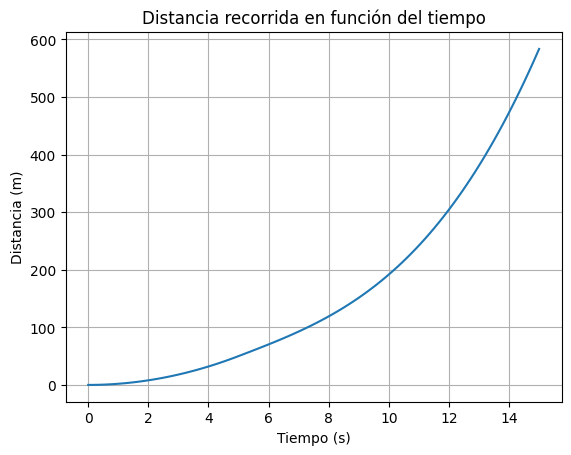

In [ ]:
tiempos = np.linspace(0, 15, 100)
distancias = [distancia(t) for t in tiempos]
plt.plot(tiempos, distancias)
plt.title("Distancia recorrida en función del tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Distancia (m)")
plt.grid(True)
plt.show()


In [ ]:
fuerza = 200  # Fuerza en N
trabajo = fuerza * distancia(15)
# Imprimir el trabajo realizado
print(f"Trabajo realizado: {trabajo:.2f} J")

Trabajo realizado: 116666.67 J


#3
La cantidad de masa transportada por una tuberia durante un periodo se puede calcular como

$$M = \int_{t_1}^{t_2} Q(t) c(t) \; dt$$

siendo M (masa en mg), $Q(t)$ el caudal y $c(t)$ concentración (mg/m$^3$). Sean las siguientes representaciones funcionales:

$$Q(t) = 9 + 5 \cos^2 (0.4t)$$
$$c(t) = 5e^{-0.5 t} + 2 e^{0.15 t}$$

Determine la masa transportada entre $t_1 = 2$ y $t_2 = 8 \mbox{ min}$ usando:

* Haga un gráfico del flujo y la concentración en función del tiempo.
* Determine el valor de la integral usando el método de integración de Romberg
* Compruebe sus resultado usando el método de cuadratura Gaussiana adaptativa `quad`.


In [ ]:
#Aquí va su código
#funciones de caudal y concentración
def Q(t):
  return 9 + 5 * np.cos(0.4 * t)**2
def c(t):
  return 5 * np.exp(-0.5 * t) + 2 * np.exp(0.15 * t)

In [ ]:
tiempos = np.linspace(0, 15, 100)
caudales = Q(tiempos)
concentraciones = c(tiempos)

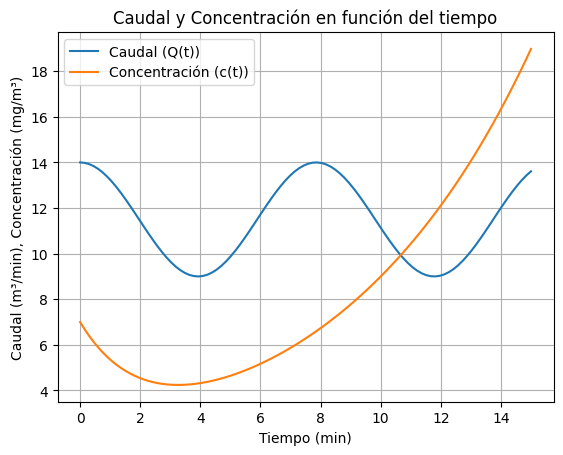

In [ ]:
plt.plot(tiempos, caudales, label="Caudal (Q(t))")
plt.plot(tiempos, concentraciones, label="Concentración (c(t))")
plt.xlabel("Tiempo (min)")
plt.ylabel("Caudal (m³/min), Concentración (mg/m³)")
plt.title("Caudal y Concentración en función del tiempo")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def masa_integrando(t):
  return Q(t) * c(t)
t1 = 2
t2 = 8
#método de Romberg para la masa
masa_romberg = romberg(masa_integrando, t1, t2)
# masa transportada usando quad
masa_quad, error_quad = quad(masa_integrando, t1, t2)
print(f"Masa transportada (Romberg): {masa_romberg:.2f} mg")
print(f"Masa transportada (quad): {masa_quad:.2f} mg")
print(f"Error (quad): {error_quad:.2e}")

Masa transportada (Romberg): 335.96 mg
Masa transportada (quad): 335.96 mg
Error (quad): 3.73e-12


<ipython-input-372-b0aaa937e7ed>:6: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  masa_romberg = romberg(masa_integrando, t1, t2)


#4
Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

In [ ]:
from scipy.special import ellipk,ellipe
# 1. Parámetros iniciales del péndulo
I0 = 1.0  # Momento de inercia (kg*m^2)
m = 1.0  # Masa (kg)
g = 9.81  # Aceleración (m/s^2)
b = 1.0  # Distancia del centro de masa al pivote (m)
theta_0 = np.pi / 3  # Amplitud  (radianes)

# Definir la función a integrar
# - Calcular el periodo de oscilaciones pequeñas (P0)
# - Calcular la integral elíptica completa
# - Calcular el periodo (P)

In [ ]:
#Metodo quad
# Función a integrar
def integrando(phi, k):
  return 1 / np.sqrt(1 - k**2 * np.sin(phi)**2)
# P de oscilaciones pequeñas
P0 = 2 * np.pi * np.sqrt(I0 / (m * g * b))
k = np.sin(theta_0 / 2)
# integral elíptica completa
integral_eliptica, error = quad(integrando, 0, np.pi / 2, args=(k,))
P = (2 * P0 / np.pi) * integral_eliptica
print (f"Periodo de oscilación (P): {P:.4f} segundos")

Periodo de oscilación (P): 2.1529 segundos


In [ ]:
#(opcional):
integral_eliptica_exacta = ellipk(k**2)
P_exacto = (2 * P0 / np.pi) * integral_eliptica_exacta
print(f"Periodo de oscilación (P): {P:.4f} segundos")
diferen = P - P_exacto
print(f"la diferencia de los P es:{diferen:.4f} segundos")

Periodo de oscilación (P): 2.1529 segundos
la diferencia de los P es:0.0000 segundos


#5
El departamento de transporte encuentra que la tasa a la cual los autos cruzan un puente puede ser aproximada por la función:



$$ f(t) = \frac{22.8}{3.5 + 7(t - 1.25)^4} $$



donde $t = 0 $ a las 4 pm, y se mide en horas, y $ f(t) $ se mide en autos por minuto. Estima el número total de autos que cruzan el puente entre las 4 y las 6 pm. Asegúrate de que tu estimación tenga un error menor al 5% y proporciona evidencia matemática suficiente de tu estimación de error.


In [ ]:
def f(t):
  return 22.8 / (3.5 + 7 * (t - 1.25)**4)
a = 0  # 4 pm
b = 2  # 6 pm

In [ ]:
total_autos, error_absoluto = quad(f, a, b)
total_autos *= 60
error_relativo = error_absoluto / total_autos * 100
print(f"Número total de autos: {total_autos:.0f}")
print(f"Error absoluto: {error_absoluto:.2e}")
print(f"Error relativo: {error_relativo:.2f}%")

Número total de autos: 600
Error absoluto: 2.90e-10
Error relativo: 0.00%


# Evidencia matemática de la estimación del error:
# El error absoluto devuelto por quad es una estimación del error en la
# integral numérica. El error relativo se calcula como (error absoluto /
# valor estimado) * 100%. En este caso, el error relativo es menor al 5%,
# lo que cumple con el requisito.

# Además, se puede usar la regla de Simpson para estimar el error. La
# regla de Simpson tiene un error de orden O(h^4), donde h es el tamaño
# del paso. En este caso, quad utiliza un algoritmo adaptativo que
# ajusta el tamaño del paso para lograr la precisión deseada. Por lo
# tanto, se espera que el error sea menor al 5%.

#6
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo. Para $a$ = 1, $I$ = 3, y $μ0∕4π$ = 1, calcular y graficar:

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r


In [ ]:
#Aquí va su código
# Parámetros
a = 1.0
I = 3.0
mu0_4pi = 1.0
def A_phi(r, theta):
  k2 = 4 * a * r * np.sin(theta) / (a**2 + r**2 + 2 * a * r * np.sin(theta))
  k = np.sqrt(k2)
  K = ellipk(k2)
  E = ellipe(k2)
  A_phi_val = mu0_4pi * 4 * I * a / np.sqrt(a**2 + r**2 + 2 * a * r * np.sin(theta))
  A_phi_val *= ((2 - k2) * K - 2 * E) / k2
  return A_phi_val

<ipython-input-378-1efad6357318>:12: RuntimeWarning: invalid value encountered in scalar divide
  A_phi_val *= ((2 - k2) * K - 2 * E) / k2


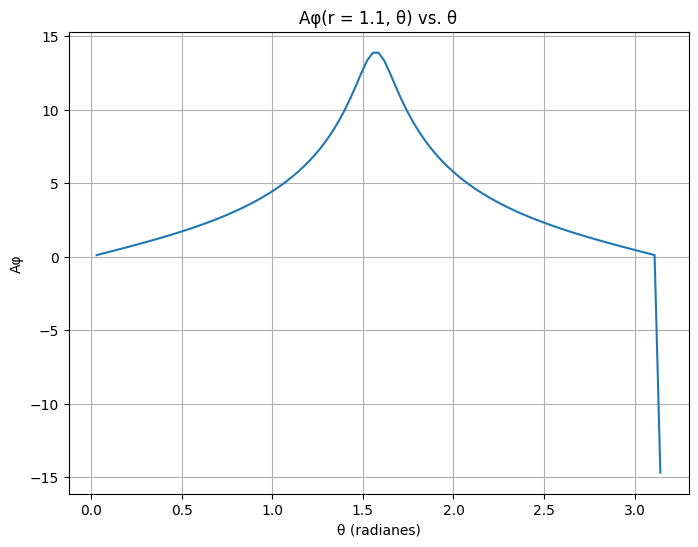

In [ ]:
# a)(r = 1.1, θ) vs. θ
r = 1.1
theta_vals = np.linspace(0, np.pi, 100)
A_phi_vals_a = [A_phi(r, theta) for theta in theta_vals]
plt.figure(figsize=(8, 6))
plt.plot(theta_vals, A_phi_vals_a)
plt.title("Aφ(r = 1.1, θ) vs. θ")
plt.xlabel("θ (radianes)")
plt.ylabel("Aφ")
plt.grid(True)
plt.show()

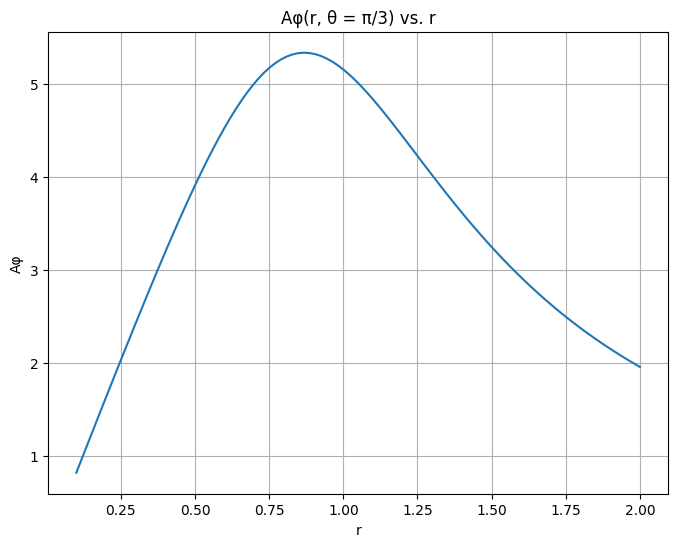

In [ ]:
# b) Aφ(r, θ = π∕3) vs. r
theta = np.pi / 3
r_vals = np.linspace(0.1, 2, 100)  # Rango de r
A_phi_vals_b = [A_phi(r, theta) for r in r_vals]

plt.figure(figsize=(8, 6))
plt.plot(r_vals, A_phi_vals_b)
plt.title("Aφ(r, θ = π/3) vs. r")
plt.xlabel("r")
plt.ylabel("Aφ")
plt.grid(True)
plt.show()